Avviare l'env:<br>
cd .env<br>
source bin/activate

Disattivarlo:
deactivate

-------------------------------------

    

In [28]:
import os
import pandas as pd
from functions_grafo import *
from ricerca_locale import *
from grasp import *
from tabu_search import *
import copy


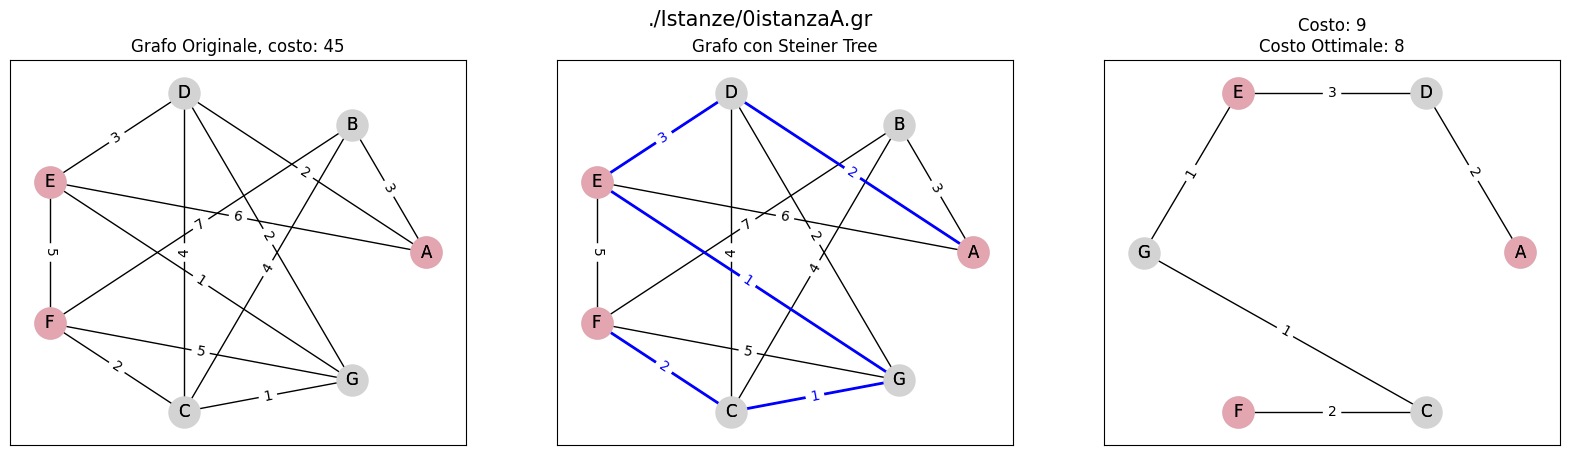

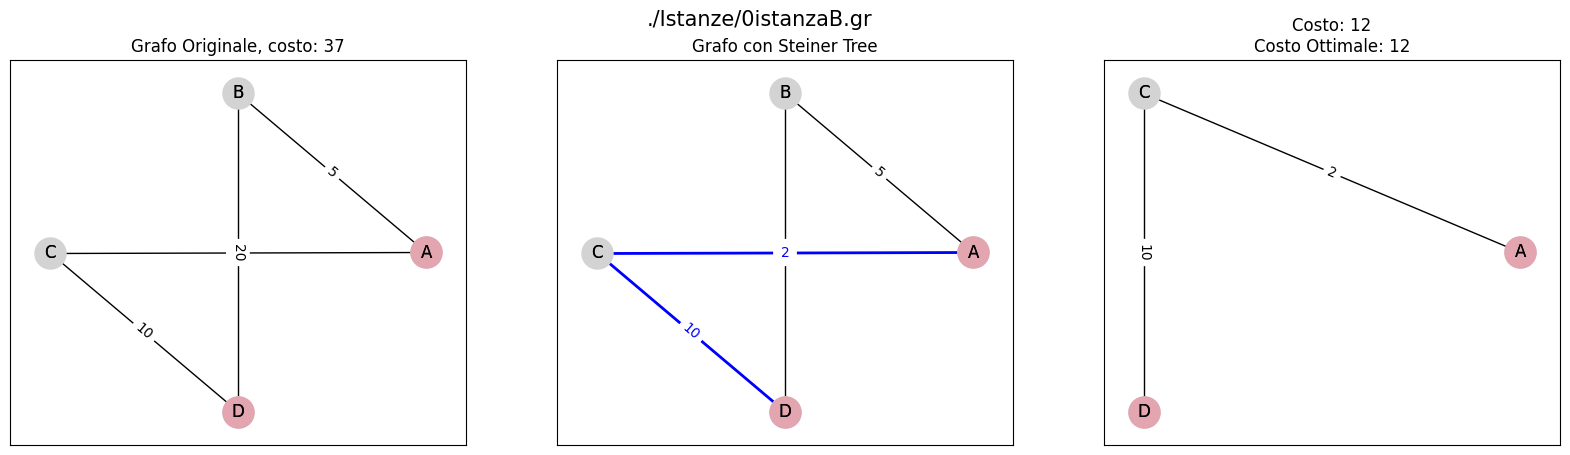

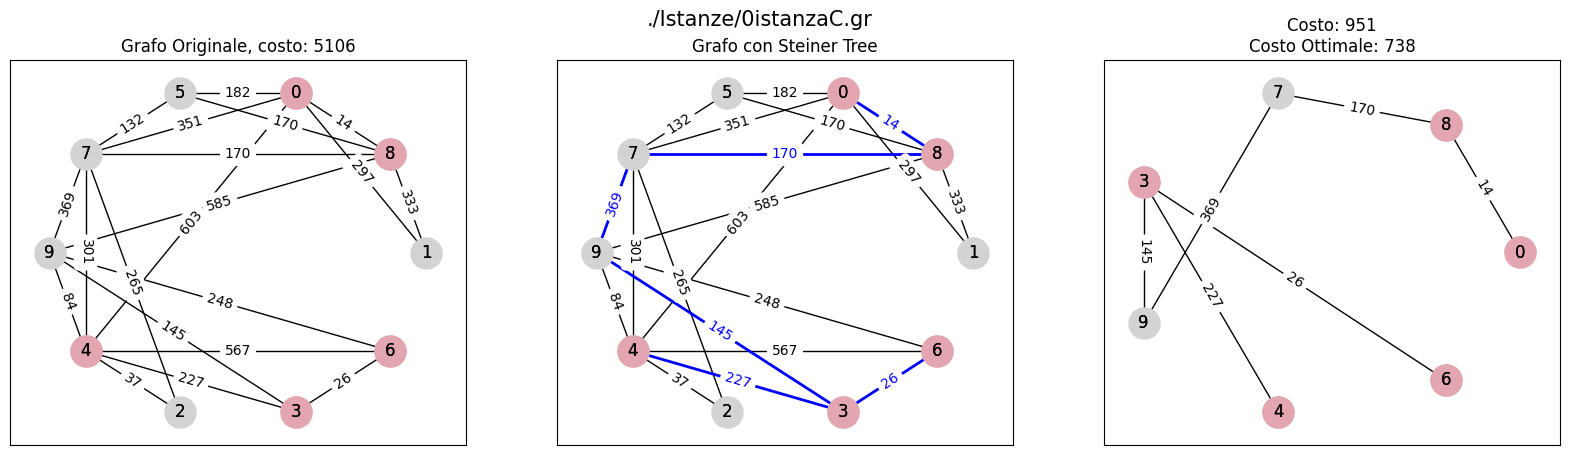

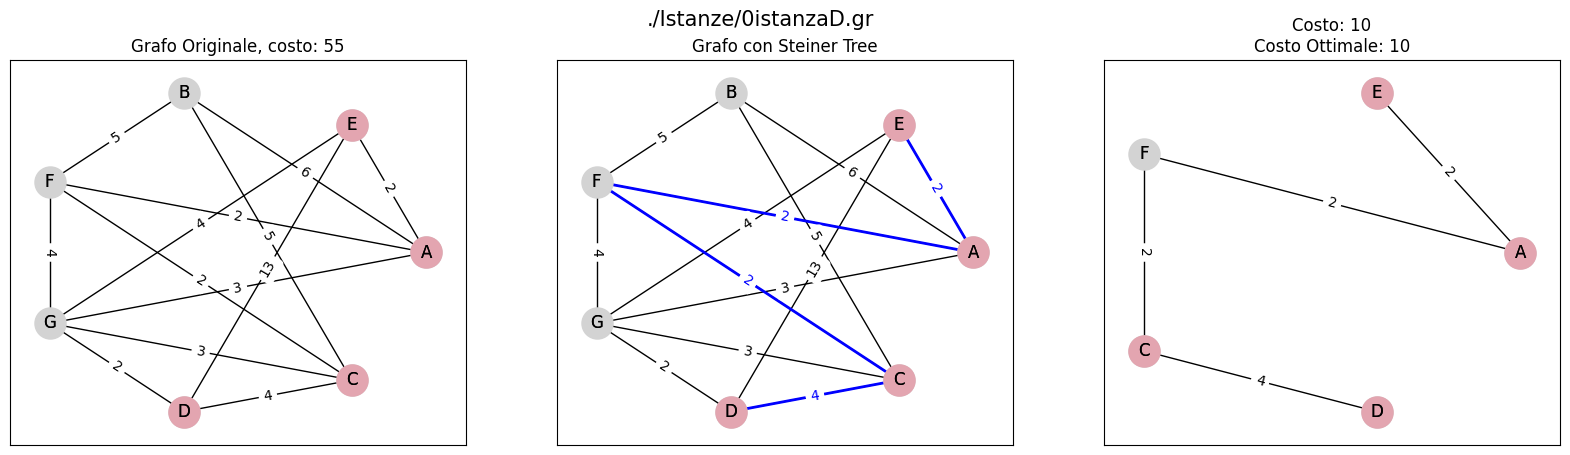

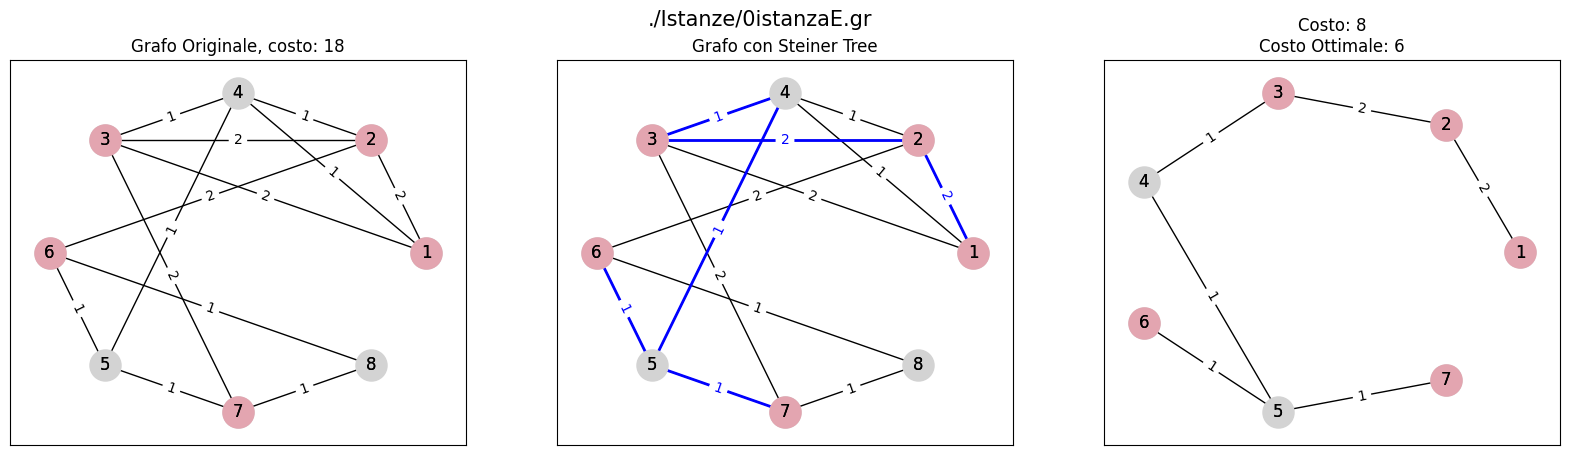

In [9]:
#PROVE DEI RISULTATI OTTENUTI applicando l'euristica0: NAIVE
#Lettura delle istanze da file ed esecuzione
file_path = "./Istanze/0istanzaA.gr" 
grafo = create_graph(file_path)
steiner_tree, timeS = naive(grafo)
draw_row_graph(file_path,grafo,steiner_tree)


file_path = "./Istanze/0istanzaB.gr" 
grafo1 = create_graph(file_path)
steiner_tree1, timeS = naive(grafo1)
draw_row_graph(file_path,grafo1,steiner_tree1)

file_path = "./Istanze/0istanzaC.gr" 
grafo2 = create_graph(file_path)
steiner_tree2, timeS = naive(grafo2)
draw_row_graph(file_path,grafo2,steiner_tree2)

file_path = "./Istanze/0istanzaD.gr" 
grafo3 = create_graph(file_path)
steiner_tree3, timeS = naive(grafo3)
draw_row_graph(file_path,grafo3,steiner_tree3)

file_path = "./Istanze/0istanzaE.gr" 
grafoE = create_graph(file_path)
steiner_treeE, timeS = naive(grafoE)
draw_row_graph(file_path,grafoE,steiner_treeE)



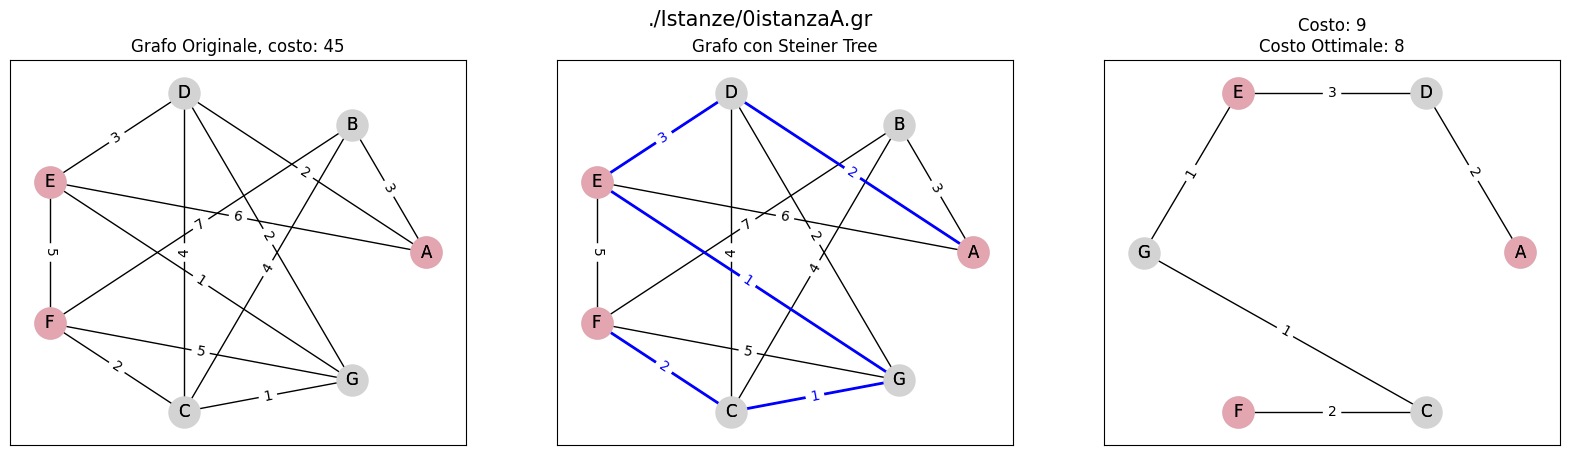

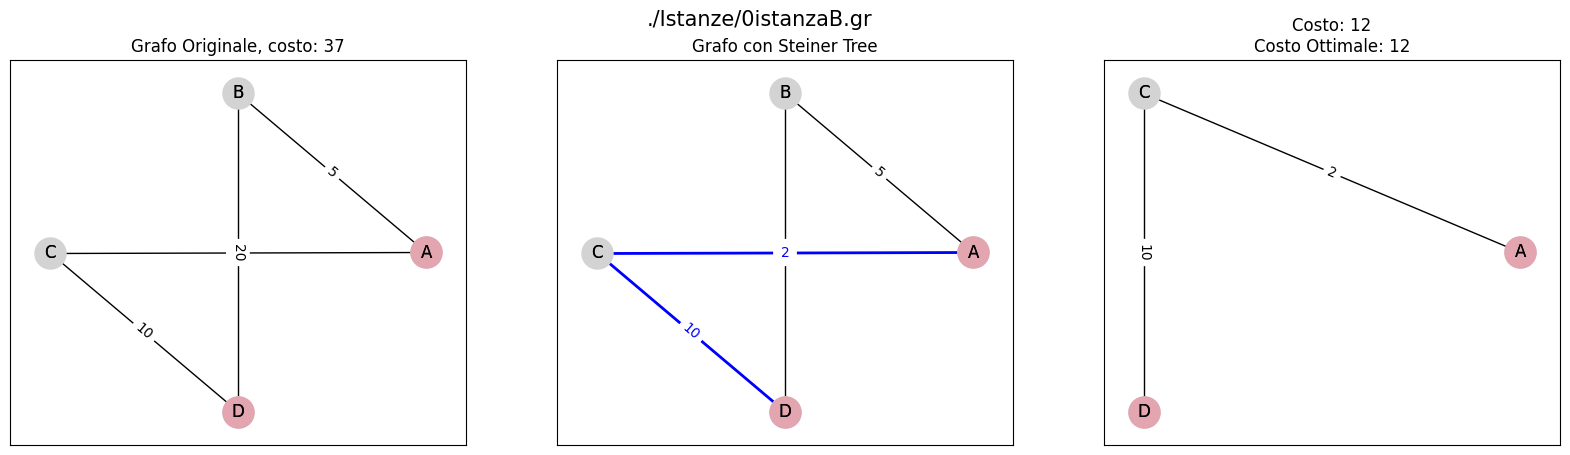

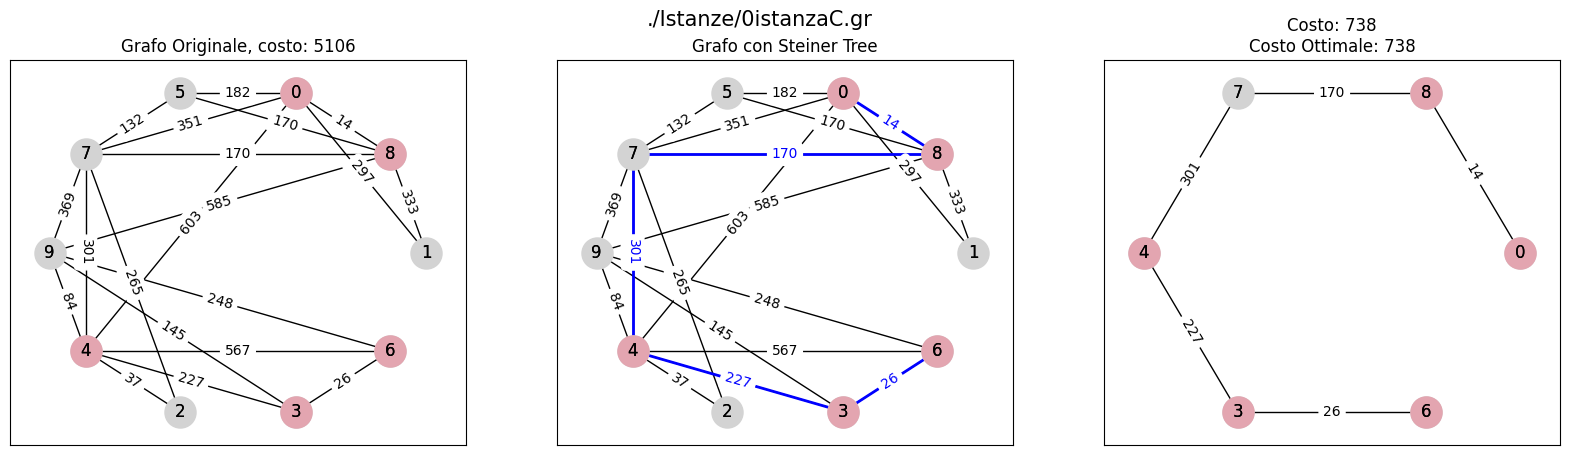

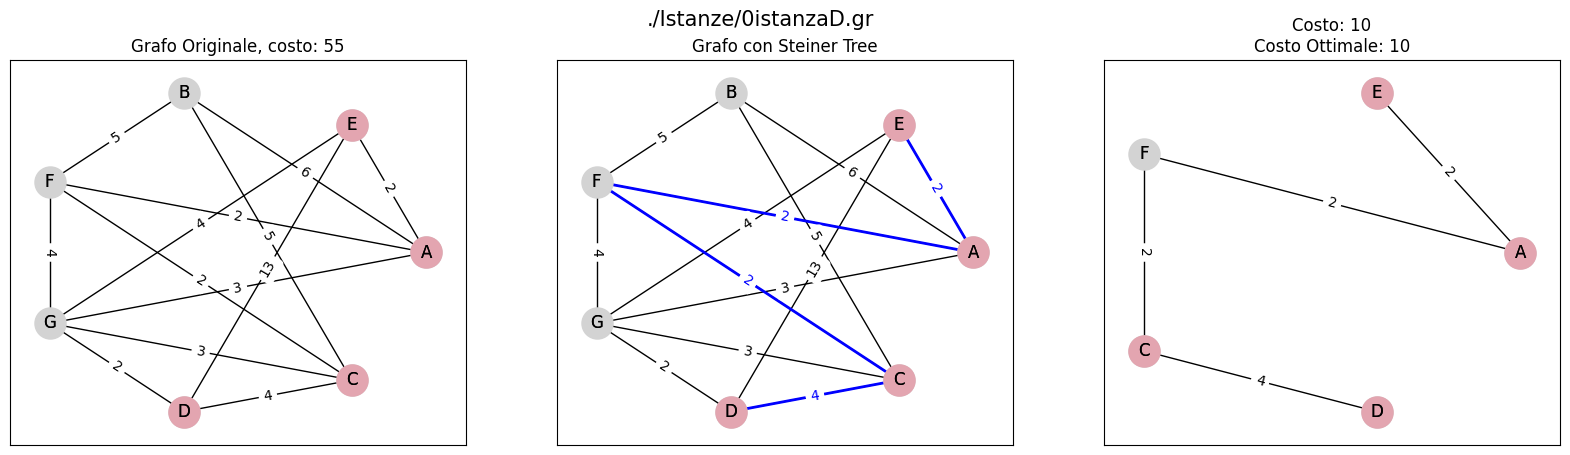

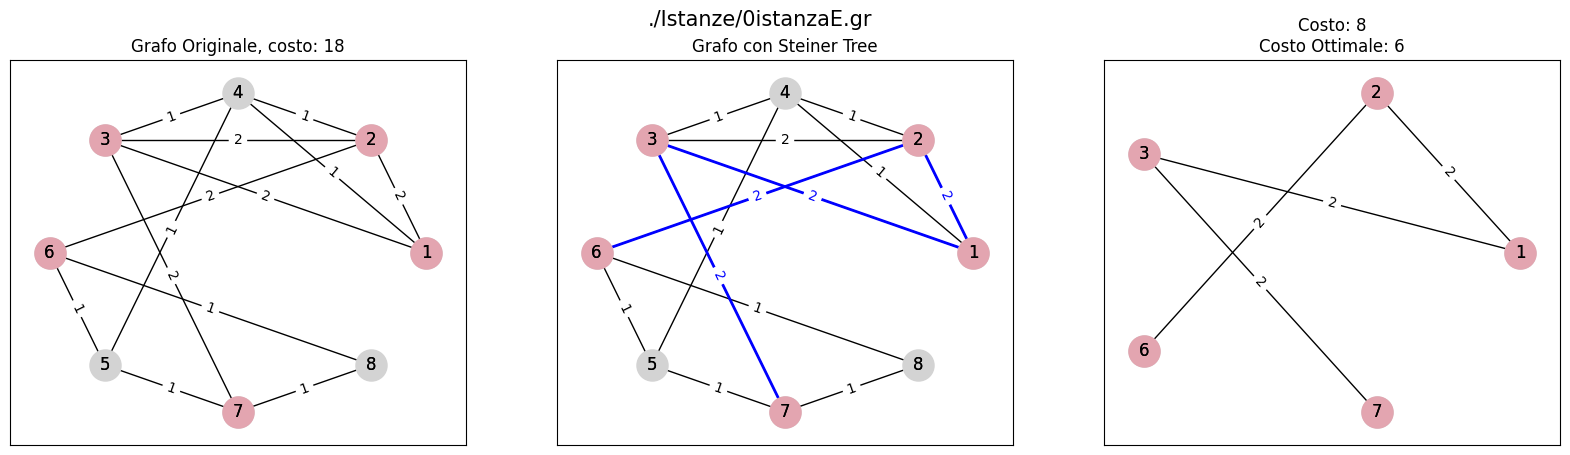

In [10]:
#PROVE DEI RISULTATI OTTENUTI applicando l'euristica1: shortest path

#Lettura delle istanze da file ed esecuzione
file_path = "./Istanze/0istanzaA.gr" 
grafo = create_graph(file_path)
steiner_tree, timeS = shortest_path(grafo)
draw_row_graph(file_path,grafo,steiner_tree)


file_path = "./Istanze/0istanzaB.gr" 
grafo1 = create_graph(file_path)
steiner_tree1, timeS = shortest_path(grafo1)
draw_row_graph(file_path,grafo1,steiner_tree1)

file_path = "./Istanze/0istanzaC.gr" 
grafo2 = create_graph(file_path)
steiner_tree2, timeS = shortest_path(grafo2)
draw_row_graph(file_path,grafo2,steiner_tree2)

file_path = "./Istanze/0istanzaD.gr" 
grafo3 = create_graph(file_path)
steiner_tree3, timeS = shortest_path(grafo3)
draw_row_graph(file_path,grafo3,steiner_tree3)

file_path = "./Istanze/0istanzaE.gr" 
grafoE = create_graph(file_path)
steiner_treeE, timeS = shortest_path(grafoE)
draw_row_graph(file_path,grafoE,steiner_treeE)



In [11]:
#Valutazione su tutte le istanze presenti dell'euristica naive: 
data_naive = {
    'Nome': [],
    'Num_Vertici': [],
    'Num_Terminals': [],
    'Num_Archi': [],
    'Num_Vertici_Steiner': [],
    'Num_Archi_Steiner': [],
    'Costo_Steiner_naive':[],
    'Costo_Ottimale':[],
    'Differenza_ottimo':[],
    'Time(s)':[]
}

directory = './Istanze/'

# Iterate over all files in the directory
for filename in sorted(os.listdir(directory)):
    #Prendo i nomi dei file
    file_path = os.path.join(directory, filename)
    #print(file_path)
    #Calcolo i valori
    grafo = create_graph(file_path)
    steiner_tree, timeS = naive(grafo)
    
    #Aggiungo i risultati
    data_naive['Nome'].append(filename.split('.')[0])
    data_naive['Num_Vertici'].append(grafo.get_num_vertices())
    data_naive['Num_Terminals'].append(grafo.get_num_vertices_steiner())
    data_naive['Num_Archi'].append(grafo.get_num_edges())
    data_naive['Num_Vertici_Steiner'].append(steiner_tree.get_num_vertices())
    data_naive['Num_Archi_Steiner'].append(steiner_tree.get_num_edges())
    costo_albero_minimo = steiner_tree.calculate_cost()
    ottimo = grafo.get_optimal_cost_steiner_tree()
    difference = int(costo_albero_minimo) - int(ottimo)
    data_naive['Costo_Steiner_naive'].append(costo_albero_minimo)
    data_naive['Costo_Ottimale'].append(ottimo)
    data_naive['Differenza_ottimo'].append(difference)
    data_naive['Time(s)'].append(timeS)
    

df = pd.DataFrame(data_naive).set_index('Nome')
df = df.sort_index()
pd.set_option('display.max_columns', None)  # Imposta la larghezza massima delle colonne a None
pd.set_option('display.expand_frame_repr', False) 

# Print the table
print("Risultati ottenuti applicando l'euristica: NAIVE")
print(df)
print(data_naive)

Risultati ottenuti applicando l'euristica: NAIVE
              Num_Vertici  Num_Terminals  Num_Archi  Num_Vertici_Steiner  Num_Archi_Steiner  Costo_Steiner_naive Costo_Ottimale  Differenza_ottimo   Time(s)
Nome                                                                                                                                                        
0istanzaA               7              3         13                    6                  5                    9              8                  1  0.000098
0istanzaB               4              2          4                    3                  2                   12             12                  0  0.000026
0istanzaC              10              5         20                    7                  6                  951            738                213  0.000133
0istanzaD               7              4         13                    5                  4                   10             10                  0  0.000071
0istanzaE

In [2]:
#Valutazione su tutte le istanze presenti dell'euristica1: shortest path
data = {
    'Nome': [],
    'Num_Vertici': [],
    'Num_Terminals': [],
    'Num_Archi': [],
    'Num_Vertici_Steiner': [],
    'Num_Archi_Steiner': [],
    'Costo_Steiner_shortest':[],
    'Costo_Ottimale':[],
    'Differenza_ottimo':[],
    'Time(s)':[],
}

directory = './Istanze/'

# Iterate over all files in the directory
for filename in sorted(os.listdir(directory)):
    #Prendo i nomi dei file
    file_path = os.path.join(directory, filename)
    #print(file_path)
    #Calcolo i valori
    grafo = create_graph(file_path)
    steiner_tree, timeS = shortest_path(grafo)
    
    #Aggiungo i risultati
    data['Nome'].append(filename.split('.')[0])
    data['Num_Vertici'].append(grafo.get_num_vertices())
    data['Num_Terminals'].append(grafo.get_num_vertices_steiner())
    data['Num_Archi'].append(grafo.get_num_edges())
    data['Num_Vertici_Steiner'].append(steiner_tree.get_num_vertices())
    data['Num_Archi_Steiner'].append(steiner_tree.get_num_edges())
    costo_albero_minimo = steiner_tree.calculate_cost()
    ottimo = grafo.get_optimal_cost_steiner_tree()
    difference = int(costo_albero_minimo) - int(ottimo)
    data['Costo_Steiner_shortest'].append(costo_albero_minimo)
    data['Costo_Ottimale'].append(ottimo)
    data['Differenza_ottimo'].append(difference)
    data['Time(s)'].append(timeS)
    

df = pd.DataFrame(data).set_index('Nome')
df = df.sort_index()
pd.set_option('display.max_columns', None)  # Imposta la larghezza massima delle colonne a None
pd.set_option('display.expand_frame_repr', False) 


# Print the table
print("risultati ottenuti applicando l'euristica1: SHORTEST PATH")
print(df)
print(data)

risultati ottenuti applicando l'euristica1: SHORTEST PATH
              Num_Vertici  Num_Terminals  Num_Archi  Num_Vertici_Steiner  Num_Archi_Steiner  Costo_Steiner_shortest Costo_Ottimale  Differenza_ottimo    Time(s)
Nome                                                                                                                                                            
0istanzaA               7              3         13                    6                  5                       9              8                  1   0.000826
0istanzaB               4              2          4                    3                  2                      12             12                  0   0.000422
0istanzaC              10              5         20                    6                  5                     738            738                  0   0.001172
0istanzaD               7              4         13                    5                  4                      10             10       

COSTO FINALE: 8
VERTICI FINALE: ['A', 'E', 'F', 'C', 'G', 'D']
ARCHI FINALE: [('A', 'D'), ('E', 'G'), ('F', 'C'), ('C', 'G'), ('G', 'D')]
numero iterazioni: 2


Text(0.5, 1.0, 'Soluzione finale con LS')

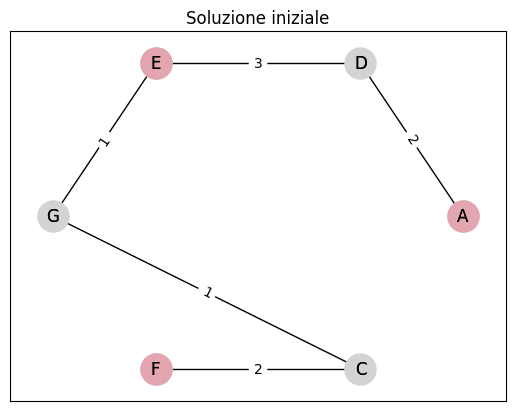

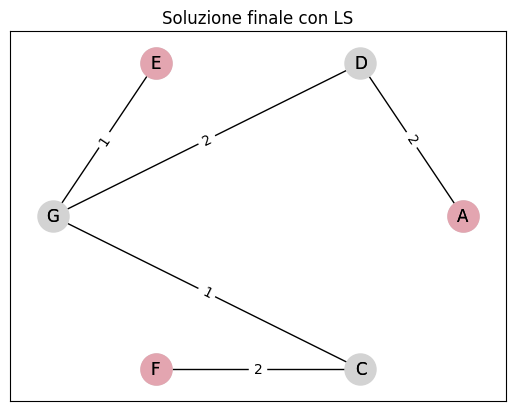

In [13]:
#Prima prova di ricerca Locale
file_path = "./Istanze/0istanzaA.gr" 
grafo = create_graph(file_path)
steiner_tree, timeS = shortest_path(grafo)
costo = steiner_tree.calculate_cost()
plt.figure()
steiner_tree.draw_graph()
plt.title("Soluzione iniziale")
best_solution, best_solution_cost, k, _ = local_search(grafo, steiner_tree, costo)
print("COSTO FINALE:", best_solution_cost)
print("VERTICI FINALE:", best_solution.get_vertices())
print("ARCHI FINALE:", remove_duplicate(best_solution.get_edges()))
print("numero iterazioni:", k)
plt.figure()
best_solution.draw_graph()
plt.title("Soluzione finale con LS")



In [14]:
#Valutazione su tutte le istanze presenti della ricerca locale
data_ls_naive = {
    'Nome': [],
    'Num_Vertici': [],
    'Num_Terminals': [],
    'Num_Archi': [],
    'Num_Vertici_Steiner': [],
    'Num_Archi_Steiner': [],
    'Costo_con_euristica': data_naive['Costo_Steiner_naive'],
    'Costo_LS':[],
    'Costo_Ottimale':[],
    'Differenza_ottimo':[],
    'k':[],
    'Time(s)':[],
}

directory = './Istanze/'

# Iterate over all files in the directory
for filename in sorted(os.listdir(directory)):
    #Prendo i nomi dei file
    file_path = os.path.join(directory, filename)
    #print(file_path)
    #Calcolo i valori
    grafo = create_graph(file_path)
    sol_iniziale, _ = naive(grafo)
    best_solution, best_solution_cost, k, timeLS = local_search(grafo, sol_iniziale, sol_iniziale.calculate_cost())
    
    
    #Aggiungo i risultati
    data_ls_naive['Nome'].append(filename.split('.')[0])
    data_ls_naive['Num_Vertici'].append(grafo.get_num_vertices())
    data_ls_naive['Num_Terminals'].append(grafo.get_num_vertices_steiner())
    data_ls_naive['Num_Archi'].append(grafo.get_num_edges())
    data_ls_naive['Num_Vertici_Steiner'].append(best_solution.get_num_vertices())
    data_ls_naive['Num_Archi_Steiner'].append(best_solution.get_num_edges())
    costo_albero_minimo = best_solution.calculate_cost()
    ottimo = grafo.get_optimal_cost_steiner_tree()
    difference = int(costo_albero_minimo) - int(ottimo)
    data_ls_naive['Costo_LS'].append(costo_albero_minimo)
    data_ls_naive['Costo_Ottimale'].append(ottimo)
    data_ls_naive['Differenza_ottimo'].append(difference)
    data_ls_naive['k'].append(k)
    data_ls_naive['Time(s)'].append(timeLS)
    
df1 = pd.DataFrame(data_ls_naive).set_index('Nome')
df1 = df1.sort_index()
pd.set_option('display.max_columns', None) 
pd.set_option('display.expand_frame_repr', False) 


# Print the table
print("Valutazione risultati naive + ricerca locale first improvement")
print(df1)
print(data_ls_naive)


Valutazione risultati naive + ricerca locale first improvement
              Num_Vertici  Num_Terminals  Num_Archi  Num_Vertici_Steiner  Num_Archi_Steiner  Costo_con_euristica   Costo_LS Costo_Ottimale  Differenza_ottimo   k     Time(s)
Nome                                                                                                                                                                         
0istanzaA               7              3         13                    6                  5                    9          8              8                  0   2    0.000751
0istanzaB               4              2          4                    3                  2                   12         12             12                  0   1    0.000115
0istanzaC              10              5         20                    6                  5                  951        738            738                  0   2    0.001439
0istanzaD               7              4         13                

In [15]:
#Valutazione su tutte le istanze presenti della ricerca locale
data_ls_short = {
    'Nome': [],
    'Num_Vertici': [],
    'Num_Terminals': [],
    'Num_Archi': [],
    'Num_Vertici_Steiner': [],
    'Num_Archi_Steiner': [],
    'Costo_con_euristica': data['Costo_Steiner_shortest'],
    'Costo_LS':[],
    'Costo_Ottimale':[],
    'Differenza_ottimo':[],
    'k':[],
    'Time(s)':[],
}

directory = './Istanze/'

# Iterate over all files in the directory
for filename in sorted(os.listdir(directory)):
    #Prendo i nomi dei file
    file_path = os.path.join(directory, filename)
    #print(file_path)
    #Calcolo i valori
    grafo = create_graph(file_path)
    sol_iniziale, _ = shortest_path(grafo)
    best_solution, best_solution_cost, k, timeLS = local_search(grafo, sol_iniziale, sol_iniziale.calculate_cost())
    
    
    #Aggiungo i risultati
    data_ls_short['Nome'].append(filename.split('.')[0])
    data_ls_short['Num_Vertici'].append(grafo.get_num_vertices())
    data_ls_short['Num_Terminals'].append(grafo.get_num_vertices_steiner())
    data_ls_short['Num_Archi'].append(grafo.get_num_edges())
    data_ls_short['Num_Vertici_Steiner'].append(best_solution.get_num_vertices())
    data_ls_short['Num_Archi_Steiner'].append(best_solution.get_num_edges())
    costo_albero_minimo = best_solution.calculate_cost()
    ottimo = grafo.get_optimal_cost_steiner_tree()
    difference = int(costo_albero_minimo) - int(ottimo)
    data_ls_short['Costo_LS'].append(costo_albero_minimo)
    data_ls_short['Costo_Ottimale'].append(ottimo)
    data_ls_short['Differenza_ottimo'].append(difference)
    data_ls_short['k'].append(k)
    data_ls_short['Time(s)'].append(timeLS)
    
df1 = pd.DataFrame(data_ls_short).set_index('Nome')
df1 = df1.sort_index()
pd.set_option('display.max_columns', None) 
pd.set_option('display.expand_frame_repr', False) 


# Print the table
print("Valutazione risultati shortest path + ricerca locale first improvement")
print(df1)
print(data_ls_short)

Valutazione risultati shortest path + ricerca locale first improvement
              Num_Vertici  Num_Terminals  Num_Archi  Num_Vertici_Steiner  Num_Archi_Steiner  Costo_con_euristica   Costo_LS Costo_Ottimale  Differenza_ottimo   k     Time(s)
Nome                                                                                                                                                                         
0istanzaA               7              3         13                    6                  5                    9          8              8                  0   2    0.001212
0istanzaB               4              2          4                    3                  2                   12         12             12                  0   1    0.000139
0istanzaC              10              5         20                    6                  5                  738        738            738                  0   1    0.000532
0istanzaD               7              4         13        

COSTO FINALE: 8
VERTICI FINALE: ['A', 'E', 'F', 'C', 'G', 'D']
ARCHI FINALE: [('A', 'D'), ('E', 'G'), ('F', 'C'), ('C', 'G'), ('G', 'D')]
numero iterazioni: 2


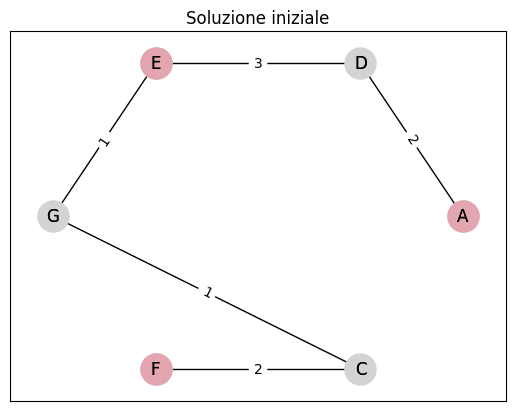

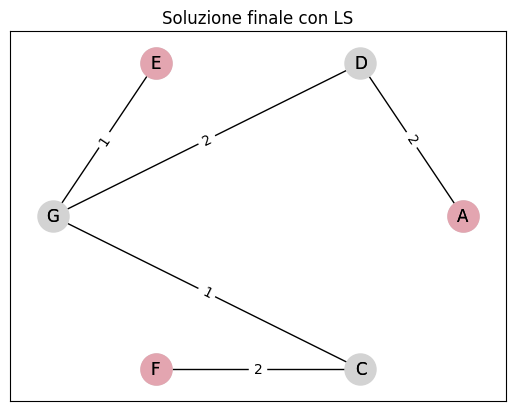

In [9]:
#Prima prova di ricerca Locale
file_path = "./Istanze/0istanzaA.gr" 
grafo = create_graph(file_path)
steiner_tree, timeS = shortest_path(grafo)
costo = steiner_tree.calculate_cost()
plt.figure()
steiner_tree.draw_graph()
plt.title("Soluzione iniziale")
best_solution, best_solution_cost, k, _ = local_search_best_improvment(grafo, steiner_tree, costo)
print("COSTO FINALE:", best_solution_cost)
print("VERTICI FINALE:", best_solution.get_vertices())
print("ARCHI FINALE:", remove_duplicate(best_solution.get_edges()))
print("numero iterazioni:", k)
plt.figure()
plt.title("Soluzione finale con LS")
best_solution.draw_graph()




In [10]:
#Valutazione su tutte le istanze presenti della ricerca locale best improvmnet
data_ls_best = {
    'Nome': [],
    'Num_Vertici': [],
    'Num_Terminals': [],
    'Num_Archi': [],
    'Num_Vertici_Steiner': [],
    'Num_Archi_Steiner': [],
    'Costo_con_euristica': data_naive['Costo_Steiner_naive'],
    'Costo_LS':[],
    'Costo_Ottimale':[],
    'Differenza_ottimo':[],
    'k':[],
    'Time(s)':[],
}

directory = './Istanze/'

c = 0
# Iterate over all files in the directory
for filename in sorted(os.listdir(directory)):
    #Prendo i nomi dei file
    file_path = os.path.join(directory, filename)
    #print(file_path)
    #Calcolo i valori
    grafo = create_graph(file_path)
    sol_iniziale, _ = naive(grafo)
    best_solution, best_solution_cost, k, timeLS = local_search_best_improvment(grafo, sol_iniziale, sol_iniziale.calculate_cost())
    
    
    #Aggiungo i risultati
    data_ls_best['Nome'].append(filename.split('.')[0])
    data_ls_best['Num_Vertici'].append(grafo.get_num_vertices())
    data_ls_best['Num_Terminals'].append(grafo.get_num_vertices_steiner())
    data_ls_best['Num_Archi'].append(grafo.get_num_edges())
    data_ls_best['Num_Vertici_Steiner'].append(best_solution.get_num_vertices())
    data_ls_best['Num_Archi_Steiner'].append(best_solution.get_num_edges())
    costo_albero_minimo = best_solution.calculate_cost()
    ottimo = grafo.get_optimal_cost_steiner_tree()
    difference = int(costo_albero_minimo) - int(ottimo)
    data_ls_best['Costo_LS'].append(costo_albero_minimo)
    data_ls_best['Costo_Ottimale'].append(ottimo)
    data_ls_best['Differenza_ottimo'].append(difference)
    data_ls_best['k'].append(k)
    data_ls_best['Time(s)'].append(timeLS)
    
df2 = pd.DataFrame(data_ls_best).set_index('Nome')
df2 = df2.sort_index()
pd.set_option('display.max_columns', None) 
pd.set_option('display.expand_frame_repr', False) 


# Print the table
print("Valutazione risultati naive + ricerca locale best improvement")
print(df2)
print(data_ls_best)


Valutazione risultati naive + ricerca locale best improvement
              Num_Vertici  Num_Terminals  Num_Archi  Num_Vertici_Steiner  Num_Archi_Steiner  Costo_con_euristica   Costo_LS Costo_Ottimale  Differenza_ottimo   k      Time(s)
Nome                                                                                                                                                                          
0istanzaA               7              3         13                    6                  5                    9          8              8                  0   2     0.002411
0istanzaB               4              2          4                    3                  2                   12         12             12                  0   1     0.000277
0istanzaC              10              5         20                    6                  5                  951        738            738                  0   2     0.003033
0istanzaD               7              4         13            

In [11]:
#Valutazione su tutte le istanze presenti della ricerca locale
data_ls_short_best = {
    'Nome': [],
    'Num_Vertici': [],
    'Num_Terminals': [],
    'Num_Archi': [],
    'Num_Vertici_Steiner': [],
    'Num_Archi_Steiner': [],
    'Costo_con_euristica': data['Costo_Steiner_shortest'],
    'Costo_LS':[],
    'Costo_Ottimale':[],
    'Differenza_ottimo':[],
    'k':[],
    'Time(s)':[],
}

directory = './Istanze/'

# Iterate over all files in the directory
for filename in sorted(os.listdir(directory)):
    #Prendo i nomi dei file
    file_path = os.path.join(directory, filename)
    #print(file_path)
    #Calcolo i valori
    grafo = create_graph(file_path)
    sol_iniziale, _ = shortest_path(grafo)
    best_solution, best_solution_cost, k, timeLS = local_search_best_improvment(grafo, sol_iniziale, sol_iniziale.calculate_cost())
    
    
    #Aggiungo i risultati
    data_ls_short_best['Nome'].append(filename.split('.')[0])
    data_ls_short_best['Num_Vertici'].append(grafo.get_num_vertices())
    data_ls_short_best['Num_Terminals'].append(grafo.get_num_vertices_steiner())
    data_ls_short_best['Num_Archi'].append(grafo.get_num_edges())
    data_ls_short_best['Num_Vertici_Steiner'].append(best_solution.get_num_vertices())
    data_ls_short_best['Num_Archi_Steiner'].append(best_solution.get_num_edges())
    costo_albero_minimo = best_solution.calculate_cost()
    ottimo = grafo.get_optimal_cost_steiner_tree()
    difference = int(costo_albero_minimo) - int(ottimo)
    data_ls_short_best['Costo_LS'].append(costo_albero_minimo)
    data_ls_short_best['Costo_Ottimale'].append(ottimo)
    data_ls_short_best['Differenza_ottimo'].append(difference)
    data_ls_short_best['k'].append(k)
    data_ls_short_best['Time(s)'].append(timeLS)
    
df2_short = pd.DataFrame(data_ls_short_best).set_index('Nome')
df2_short = df2_short.sort_index()
pd.set_option('display.max_columns', None) 
pd.set_option('display.expand_frame_repr', False) 


# Print the table
print("Valutazione risultati shortest path + ricerca locale best improvement")
print(df2_short)
print(data_ls_short_best)


Valutazione risultati shortest path + ricerca locale best improvement
              Num_Vertici  Num_Terminals  Num_Archi  Num_Vertici_Steiner  Num_Archi_Steiner  Costo_con_euristica   Costo_LS Costo_Ottimale  Differenza_ottimo   k     Time(s)
Nome                                                                                                                                                                         
0istanzaA               7              3         13                    6                  5                    9          8              8                  0   2    0.001333
0istanzaB               4              2          4                    3                  2                   12         12             12                  0   1    0.000281
0istanzaC              10              5         20                    6                  5                  738        738            738                  0   1    0.000561
0istanzaD               7              4         13         

In [27]:
print("Costo con euristica naive, costo con euristica shortest path, costo LS naive FI, costo LS shortest path FI, costo LS naive BEST, costo LS shortest path BEST")
i = 0
migliore_first_naive = 0
migliore_first_short = 0
migliore_best_naive = 0
migliore_best_short = 0
ottimo_first_naive = 0
ottimo_first_short = 0
ottimo_best_naive = 0
ottimo_best_short = 0

for i in range(0, len(data_ls_short['Differenza_ottimo'])):
    first_naive = int(data_ls_naive['Differenza_ottimo'][i])
    first_short = int(data_ls_short['Differenza_ottimo'][i])
    best_naive = int(data_ls_best['Differenza_ottimo'][i])
    best_short = int(data_ls_short_best['Differenza_ottimo'][i])
    
    print(data_naive['Nome'][i],data_naive['Differenza_ottimo'][i], data['Differenza_ottimo'][i],"----", first_naive, first_short, best_naive, best_short)
    if first_naive < first_short and first_naive < best_naive and first_naive < best_short:
        migliore_first_naive += 1
    if first_short < first_naive and first_short < best_naive and first_short < best_short:
        migliore_first_short += 1
    if best_naive < first_naive and best_naive < first_short and best_naive < best_short:
        migliore_best_naive += 1
    if best_short < first_naive and best_short < first_short and best_short < best_naive:
        migliore_best_short += 1
        
    if first_naive == 0:
        ottimo_first_naive += 1
    if first_short == 0:
        ottimo_first_short += 1
    if best_naive == 0:
        ottimo_best_naive += 1
    if best_short == 0:
        ottimo_best_short += 1

print("Totale casi: ", i+1, " senza considerare i pari merito:")
print("Migliore first naive: ", migliore_first_naive, " e ha trovato l'ottimo:", ottimo_first_naive, "/", i+1)
print("Migliore first short: ", migliore_first_short, " e ha trovato l'ottimo:", ottimo_first_short, "/", i+1)
print("Migliore best naive: ", migliore_best_naive, " e ha trovato l'ottimo:", ottimo_best_naive, "/", i+1)
print("Migliore best short: ", migliore_best_short, " e ha_trovato l'ottimo:", ottimo_best_short, "/", i+1)
        

Costo con euristica naive, costo con euristica shortest path, costo LS naive FI, costo LS shortest path FI, costo LS naive BEST, costo LS shortest path BEST
0istanzaA 1 1 ---- 0 0 0 0
0istanzaB 0 0 ---- 0 0 0 0
0istanzaC 213 0 ---- 0 0 0 0
0istanzaD 0 0 ---- 0 0 0 0
0istanzaE 2 2 ---- 0 2 0 2
0istanzaF 0 0 ---- 0 0 0 0
instance001 0 0 ---- 0 0 0 0
instance002 47 4 ---- 4 4 0 4
instance003 13 5 ---- 0 0 4 0
instance004 13 4 ---- 0 0 3 0
instance005 5 0 ---- 0 0 0 0
instance006 87 0 ---- 0 0 0 0
instance009 105 6 ---- 0 0 0 0
instance015 994 193 ---- 193 193 0 193
instance018 1119 353 ---- 242 310 237 147
instance020 1158 175 ---- 241 169 150 169
instance021 1335 293 ---- 93 293 0 293
instance027 97 8 ---- 0 3 0 3
instance031 40 10 ---- 5 5 5 5
instance032 1501 56 ---- 0 0 0 0
instance040 218 25 ---- 0 15 0 15
instance045 112 39 ---- 5 5 5 5
instance055 129 4 ---- 11 4 0 4
instance060 276 21 ---- 0 21 0 21
instance065 57 5 ---- 8 3 3 3
instance2_01 265 83 ---- 52 78 37 73
instance2_02 96

In [14]:
#DA ESEGUIRE
#Valutazione su tutte le istanze presenti della ricerca locale
data_ls_naive_MST = {
    'Nome': [],
    'Num_Vertici': [],
    'Num_Terminals': [],
    'Num_Archi': [],
    'Num_Vertici_Steiner': [],
    'Num_Archi_Steiner': [],
    'Costo_con_euristica': data_naive['Costo_Steiner_naive'],
    'Costo_LS':[],
    'Costo_Ottimale':[],
    'Differenza_ottimo':[],
    'MST':[],
    'k':[],
    'Time(s)':[],
}

directory = './Istanze/'

# Iterate over all files in the directory
for filename in sorted(os.listdir(directory)):
    
    #Prendo i nomi dei file
    file_path = os.path.join(directory, filename)
    print(file_path)
    #Calcolo i valori
    grafo = create_graph(file_path)
    sol_iniziale, _ = naive(grafo)
    best_solution, best_solution_cost, k, timeLS, mst = local_search_best_improvment_mst(grafo, sol_iniziale, sol_iniziale.calculate_cost())
    

    #Aggiungo i risultati
    data_ls_naive_MST['Nome'].append(filename.split('.')[0])
    data_ls_naive_MST['Num_Vertici'].append(grafo.get_num_vertices())
    data_ls_naive_MST['Num_Terminals'].append(grafo.get_num_vertices_steiner())
    data_ls_naive_MST['Num_Archi'].append(grafo.get_num_edges())
    data_ls_naive_MST['Num_Vertici_Steiner'].append(best_solution.get_num_vertices())
    data_ls_naive_MST['Num_Archi_Steiner'].append(best_solution.get_num_edges())
    costo_albero_minimo = best_solution.calculate_cost()
    ottimo = grafo.get_optimal_cost_steiner_tree()
    difference = int(costo_albero_minimo) - int(ottimo)
    data_ls_naive_MST['Costo_LS'].append(costo_albero_minimo)
    data_ls_naive_MST['Costo_Ottimale'].append(ottimo)
    data_ls_naive_MST['Differenza_ottimo'].append(difference)
    data_ls_naive_MST['MST'].append(mst)
    data_ls_naive_MST['k'].append(k)
    data_ls_naive_MST['Time(s)'].append(timeLS)
    
df2_naive_MST = pd.DataFrame(data_ls_naive_MST).set_index('Nome')
df2_naive_MST = df2_naive_MST.sort_index()
pd.set_option('display.max_columns', None) 
pd.set_option('display.expand_frame_repr', False) 


# Print the table
print("Valutazione risultati naive + ricerca locale best improvement + valutazione su MST")
print(df2_naive_MST)
print(data_ls_naive_MST)



./Istanze/0istanzaA.gr
./Istanze/0istanzaB.gr
./Istanze/0istanzaC.gr
./Istanze/0istanzaD.gr
./Istanze/0istanzaE.gr
./Istanze/0istanzaF.gr
./Istanze/instance001.gr
./Istanze/instance002.gr
./Istanze/instance003.gr
./Istanze/instance004.gr
./Istanze/instance005.gr
./Istanze/instance006.gr
./Istanze/instance009.gr
./Istanze/instance015.gr
./Istanze/instance018.gr
./Istanze/instance020.gr
./Istanze/instance021.gr
./Istanze/instance027.gr
./Istanze/instance031.gr
./Istanze/instance032.gr
./Istanze/instance040.gr
./Istanze/instance045.gr
./Istanze/instance055.gr
./Istanze/instance060.gr
./Istanze/instance065.gr
./Istanze/instance2_01.gr
./Istanze/instance2_02.gr
./Istanze/instance2_03.gr
./Istanze/instance2_04.gr
./Istanze/instance2_05.gr
./Istanze/instance2_07.gr
./Istanze/instance2_10.gr
./Istanze/instance2_15.gr
./Istanze/instance2_17.gr
./Istanze/instance2_20.gr
./Istanze/instance2_27.gr
./Istanze/instance2_30.gr
./Istanze/instance2_32.gr
Valutazione risultati naive + ricerca locale best

In [7]:
#TABU SEARCH
#Valutazione su tutte le istanze presenti della ricerca locale
data_tabu = {
    'Nome': [],
    'Num_Vertici': [],
    'Num_Terminals': [],
    'Num_Archi': [],
    'Num_Vertici_Steiner': [],
    'Num_Archi_Steiner': [],
    #'Costo_con_euristica': data_naive['Costo_Steiner_naive'],
    'Costo_con_euristica': 0,
    'Costo_LS':[],
    'Costo_Ottimale':[],
    'Differenza_ottimo':[],
    'k':[],
    'Time(s)':[],
}

directory = './Istanze/'
i = 0
# Iterate over all files in the directory
for filename in sorted(os.listdir(directory)):
    #Prendo i nomi dei file
    file_path = os.path.join(directory, filename)
    print(file_path)
    #Calcolo i valori
    grafo = create_graph(file_path)
    sol_iniziale, _ = naive(grafo)
    best_solution, best_solution_cost, k, timeLS = tabu(grafo, sol_iniziale, sol_iniziale.calculate_cost(), 13, 10) #Max num di intorni 13, max tabu = 10 
    
    #Aggiungo i risultati
    data_tabu['Nome'].append(filename.split('.')[0])
    data_tabu['Num_Vertici'].append(grafo.get_num_vertices())
    data_tabu['Num_Terminals'].append(grafo.get_num_vertices_steiner())
    data_tabu['Num_Archi'].append(grafo.get_num_edges())
    data_tabu['Num_Vertici_Steiner'].append(best_solution.get_num_vertices())
    data_tabu['Num_Archi_Steiner'].append(best_solution.get_num_edges())
    costo_albero_minimo = best_solution.calculate_cost()
    ottimo = grafo.get_optimal_cost_steiner_tree()
    difference = int(costo_albero_minimo) - int(ottimo)
    data_tabu['Costo_LS'].append(costo_albero_minimo)
    data_tabu['Costo_Ottimale'].append(ottimo)
    data_tabu['Differenza_ottimo'].append(difference)
    data_tabu['k'].append(k)
    data_tabu['Time(s)'].append(timeLS)
    
df_tabu = pd.DataFrame(data_tabu).set_index('Nome')
df_tabu= df_tabu.sort_index()
pd.set_option('display.max_columns', None) 
pd.set_option('display.expand_frame_repr', False) 


# Print the table
print("Valutazione risultati naive + ricerca locale con tabu")
print(df_tabu)
print(data_tabu)



./Istanze/0istanzaA.gr
./Istanze/0istanzaB.gr
./Istanze/0istanzaC.gr
./Istanze/0istanzaD.gr
./Istanze/0istanzaE.gr
./Istanze/0istanzaF.gr
./Istanze/instance001.gr
./Istanze/instance002.gr
./Istanze/instance003.gr
./Istanze/instance004.gr
./Istanze/instance005.gr
./Istanze/instance006.gr
./Istanze/instance009.gr
./Istanze/instance015.gr
./Istanze/instance018.gr
./Istanze/instance020.gr
./Istanze/instance021.gr
./Istanze/instance027.gr
./Istanze/instance031.gr
./Istanze/instance032.gr
./Istanze/instance040.gr
./Istanze/instance045.gr
./Istanze/instance055.gr
./Istanze/instance060.gr
./Istanze/instance065.gr
./Istanze/instance2_01.gr
./Istanze/instance2_02.gr
./Istanze/instance2_03.gr
./Istanze/instance2_04.gr
./Istanze/instance2_05.gr
./Istanze/instance2_07.gr
./Istanze/instance2_10.gr
./Istanze/instance2_15.gr
./Istanze/instance2_17.gr
./Istanze/instance2_20.gr
./Istanze/instance2_27.gr
./Istanze/instance2_30.gr
./Istanze/instance2_32.gr
Valutazione risultati naive + ricerca locale con 

In [16]:
#TABU SEARCH
#Valutazione su tutte le istanze presenti della ricerca locale
data_tabu_shortest = {
    'Nome': [],
    'Num_Vertici': [],
    'Num_Terminals': [],
    'Num_Archi': [],
    'Num_Vertici_Steiner': [],
    'Num_Archi_Steiner': [],
    'Costo_LS':[],
    'Costo_Ottimale':[],
    'Differenza_ottimo':[],
    'k':[],
    'Time(s)':[],
}

directory = './Istanze/'
i = 0
# Iterate over all files in the directory
for filename in sorted(os.listdir(directory)):
    #Prendo i nomi dei file
    file_path = os.path.join(directory, filename)
    print(file_path)
    #Calcolo i valori
    grafo = create_graph(file_path)
    sol_iniziale, _ = shortest_path(grafo)
    best_solution, best_solution_cost, k, timeLS = tabu(grafo, sol_iniziale, sol_iniziale.calculate_cost(), 13, 10) #Max num di intorni 13, max tabu = 10 
    
    #Aggiungo i risultati
    data_tabu_shortest['Nome'].append(filename.split('.')[0])
    data_tabu_shortest['Num_Vertici'].append(grafo.get_num_vertices())
    data_tabu_shortest['Num_Terminals'].append(grafo.get_num_vertices_steiner())
    data_tabu_shortest['Num_Archi'].append(grafo.get_num_edges())
    data_tabu_shortest['Num_Vertici_Steiner'].append(best_solution.get_num_vertices())
    data_tabu_shortest['Num_Archi_Steiner'].append(best_solution.get_num_edges())
    costo_albero_minimo = best_solution.calculate_cost()
    ottimo = grafo.get_optimal_cost_steiner_tree()
    difference = int(costo_albero_minimo) - int(ottimo)
    data_tabu_shortest['Costo_LS'].append(costo_albero_minimo)
    data_tabu_shortest['Costo_Ottimale'].append(ottimo)
    data_tabu_shortest['Differenza_ottimo'].append(difference)
    data_tabu_shortest['k'].append(k)
    data_tabu_shortest['Time(s)'].append(timeLS)
    
df_tabu_sh = pd.DataFrame(data_tabu_shortest).set_index('Nome')
df_tabu_sh = df_tabu.sort_index()
pd.set_option('display.max_columns', None) 
pd.set_option('display.expand_frame_repr', False) 


# Print the table
print("Valutazione risultati shortest path + ricerca locale con tabu")
print(df_tabu_sh)
print(data_tabu_shortest)



./Istanze/0istanzaA.gr
./Istanze/0istanzaB.gr
./Istanze/0istanzaC.gr
./Istanze/0istanzaD.gr
./Istanze/0istanzaE.gr
./Istanze/0istanzaF.gr
./Istanze/instance001.gr
./Istanze/instance002.gr
./Istanze/instance003.gr
./Istanze/instance004.gr
./Istanze/instance005.gr
./Istanze/instance006.gr
./Istanze/instance009.gr
./Istanze/instance015.gr
./Istanze/instance018.gr
./Istanze/instance020.gr
./Istanze/instance021.gr
./Istanze/instance027.gr
./Istanze/instance031.gr
./Istanze/instance032.gr
./Istanze/instance040.gr
./Istanze/instance045.gr
./Istanze/instance055.gr
./Istanze/instance060.gr
./Istanze/instance065.gr
./Istanze/instance2_01.gr
./Istanze/instance2_02.gr
./Istanze/instance2_03.gr
./Istanze/instance2_04.gr
./Istanze/instance2_05.gr
./Istanze/instance2_07.gr
./Istanze/instance2_10.gr
./Istanze/instance2_15.gr
./Istanze/instance2_17.gr
./Istanze/instance2_20.gr
./Istanze/instance2_27.gr
./Istanze/instance2_30.gr
./Istanze/instance2_32.gr
Valutazione risultati shortest path + ricerca loc

In [5]:

#Valutazione su tutte le istanze presenti della ricerca locale
data_ls_MST = {
    'Nome': [],
    'Num_Vertici': [],
    'Num_Terminals': [],
    'Num_Archi': [],
    'Num_Vertici_Steiner': [],
    'Num_Archi_Steiner': [],
    'Costo_con_euristica': data['Costo_Steiner_shortest'],
    'Costo_LS':[],
    'Costo_Ottimale':[],
    'Differenza_ottimo':[],
    'MST':[],
    'k':[],
    'Time(s)':[],
}

directory = './Istanze/'

# Iterate over all files in the directory
for filename in sorted(os.listdir(directory)):
    
    #Prendo i nomi dei file
    file_path = os.path.join(directory, filename)
    print(file_path)
    #Calcolo i valori
    grafo = create_graph(file_path)
    sol_iniziale, _ = shortest_path(grafo)
    best_solution, best_solution_cost, k, timeLS, mst = local_search_best_improvment_mst(grafo, sol_iniziale, sol_iniziale.calculate_cost())
    

    #Aggiungo i risultati
    data_ls_MST['Nome'].append(filename.split('.')[0])
    data_ls_MST['Num_Vertici'].append(grafo.get_num_vertices())
    data_ls_MST['Num_Terminals'].append(grafo.get_num_vertices_steiner())
    data_ls_MST['Num_Archi'].append(grafo.get_num_edges())
    data_ls_MST['Num_Vertici_Steiner'].append(best_solution.get_num_vertices())
    data_ls_MST['Num_Archi_Steiner'].append(best_solution.get_num_edges())
    costo_albero_minimo = best_solution.calculate_cost()
    ottimo = grafo.get_optimal_cost_steiner_tree()
    difference = int(costo_albero_minimo) - int(ottimo)
    data_ls_MST['Costo_LS'].append(costo_albero_minimo)
    data_ls_MST['Costo_Ottimale'].append(ottimo)
    data_ls_MST['Differenza_ottimo'].append(difference)
    data_ls_MST['MST'].append(mst)
    data_ls_MST['k'].append(k)
    data_ls_MST['Time(s)'].append(timeLS)
    
df2_MST = pd.DataFrame(data_ls_MST).set_index('Nome')
df2_MST = df2_MST.sort_index()
pd.set_option('display.max_columns', None) 
pd.set_option('display.expand_frame_repr', False) 


# Print the table
print("Valutazione risultati shortest path + ricerca locale best improvement + valutazione su MST")
print(df2_MST)
print(data_ls_MST)



./Istanze/0istanzaA.gr
./Istanze/0istanzaB.gr
./Istanze/0istanzaC.gr
./Istanze/0istanzaD.gr
./Istanze/0istanzaE.gr
./Istanze/0istanzaF.gr
./Istanze/instance001.gr
./Istanze/instance002.gr
./Istanze/instance003.gr
./Istanze/instance004.gr
./Istanze/instance005.gr
./Istanze/instance006.gr
./Istanze/instance009.gr
./Istanze/instance015.gr
./Istanze/instance018.gr
./Istanze/instance020.gr
./Istanze/instance021.gr
./Istanze/instance027.gr
./Istanze/instance031.gr
./Istanze/instance032.gr
./Istanze/instance040.gr
./Istanze/instance045.gr
./Istanze/instance055.gr
./Istanze/instance060.gr
./Istanze/instance065.gr
./Istanze/instance2_01.gr
./Istanze/instance2_02.gr
./Istanze/instance2_03.gr
./Istanze/instance2_04.gr
./Istanze/instance2_05.gr
./Istanze/instance2_07.gr
./Istanze/instance2_10.gr
./Istanze/instance2_15.gr
./Istanze/instance2_17.gr
./Istanze/instance2_20.gr
./Istanze/instance2_27.gr
./Istanze/instance2_30.gr
./Istanze/instance2_32.gr
Valutazione risultati shortest path + ricerca loc

In [9]:
#Valutazione su tutte le istanze presenti della GRASP CON BEST IMPROVMENT SU EURISTICA SHORTEST PATH RANDOMIZZATA
data_grasp_short = {
    'Nome': [],
    'Num_Vertici': [],
    'Num_Terminals': [],
    'Num_Archi': [],
    'Num_Vertici_Steiner': [],
    'Num_Archi_Steiner': [],
    'Euristica_con_costo_magg': [],
    'Euristica_con_costo_min': [],
    'Costo_euristica_iniziale': [],
    'Costo_grasp':[],
    'Costo_Ottimale':[],
    'Differenza_ottimo':[],
    'Time(s)':[],
}

directory = './Istanze/'

# Iterate over all files in the directory
i = 0
for filename in sorted(os.listdir(directory)):
    #Prendo i nomi dei file
    file_path = os.path.join(directory, filename)
    print(file_path)
    #Calcolo i valori
    grafo = create_graph(file_path)
    best_solution, cost, best_euri, magg, minore, time_grasp = Grasp_with_best_improvment(15, grafo, 1) #applico con shortest path
    
    
    #Aggiungo i risultati
    costo_albero_minimo = best_solution.calculate_cost()
    ottimo = grafo.get_optimal_cost_steiner_tree()
    difference = int(costo_albero_minimo) - int(ottimo)
    
    data_grasp_short['Nome'].append(filename.split('.')[0])
    data_grasp_short['Num_Vertici'].append(grafo.get_num_vertices())
    data_grasp_short['Num_Terminals'].append(grafo.get_num_vertices_steiner())
    data_grasp_short['Num_Archi'].append(grafo.get_num_edges())
    data_grasp_short['Num_Vertici_Steiner'].append(best_solution.get_num_vertices())
    data_grasp_short['Num_Archi_Steiner'].append(best_solution.get_num_edges())
    data_grasp_short['Euristica_con_costo_magg'].append(magg)
    data_grasp_short['Euristica_con_costo_min'].append(minore)
    data_grasp_short['Costo_euristica_iniziale'].append(best_euri)
    data_grasp_short['Costo_grasp'].append(costo_albero_minimo)
    data_grasp_short['Costo_Ottimale'].append(ottimo)
    data_grasp_short['Differenza_ottimo'].append(difference)
    data_grasp_short['Time(s)'].append(time_grasp)
    
    df_grasp = pd.DataFrame(data_grasp_short).set_index('Nome')
    df_grasp= df_grasp.sort_index()
    pd.set_option('display.max_columns', None) 
    pd.set_option('display.expand_frame_repr', False) 


    # Print the table
    print("Valutazione risultati grasp con best improvment su euristica shortest path randomizzata")
    print(df_grasp)
for chiave in data_grasp_short.items():
    print(chiave)

./Istanze/0istanzaA.gr
Valutazione risultati grasp con best improvment su euristica shortest path randomizzata
           Num_Vertici  Num_Terminals  Num_Archi  Num_Vertici_Steiner  Num_Archi_Steiner  Euristica_con_costo_magg  Euristica_con_costo_min  Costo_euristica_iniziale  Costo_grasp Costo_Ottimale  Differenza_ottimo   Time(s)
Nome                                                                                                                                                                                                                          
0istanzaA            7              3         13                    6                  5                        15                       15                        15            8              8                  0  0.004735
./Istanze/0istanzaB.gr
Valutazione risultati grasp con best improvment su euristica shortest path randomizzata
           Num_Vertici  Num_Terminals  Num_Archi  Num_Vertici_Steiner  Num_Archi_Steiner  Euristica_con_costo

In [2]:
#Valutazione su tutte le istanze presenti della GRASP CON BEST IMPROVMENT SU EURISTICA SHORTEST PATH RANDOMIZZATA
data_grasp_ibrida = {
    'Nome': [],
    'Num_Vertici': [],
    'Num_Terminals': [],
    'Num_Archi': [],
    'Num_Vertici_Steiner': [],
    'Num_Archi_Steiner': [],
    'Euristica_con_costo_magg': [],
    'Euristica_con_costo_min': [],
    'Costo_euristica_iniziale': [],
    'Costo_grasp':[],
    'Costo_Ottimale':[],
    'Differenza_ottimo':[],
    'Time(s)':[],
}

directory = './Istanze/'

# Iterate over all files in the directory

for filename in sorted(os.listdir(directory)):
    #Prendo i nomi dei file
    file_path = os.path.join(directory, filename)
    print(file_path)
    #Calcolo i valori
    grafo = create_graph(file_path)
    best_solution, cost, best_euri, magg, minore, time_grasp = Grasp_with_best_improvment(17, grafo, 0) #applico con shortest path
    
    
    #Aggiungo i risultati
    costo_albero_minimo = best_solution.calculate_cost()
    ottimo = grafo.get_optimal_cost_steiner_tree()
    difference = int(costo_albero_minimo) - int(ottimo)
    
    data_grasp_ibrida['Nome'].append(filename.split('.')[0])
    data_grasp_ibrida['Num_Vertici'].append(grafo.get_num_vertices())
    data_grasp_ibrida['Num_Terminals'].append(grafo.get_num_vertices_steiner())
    data_grasp_ibrida['Num_Archi'].append(grafo.get_num_edges())
    data_grasp_ibrida['Num_Vertici_Steiner'].append(best_solution.get_num_vertices())
    data_grasp_ibrida['Num_Archi_Steiner'].append(best_solution.get_num_edges())
    data_grasp_ibrida['Euristica_con_costo_magg'].append(magg)
    data_grasp_ibrida['Euristica_con_costo_min'].append(minore)
    data_grasp_ibrida['Costo_euristica_iniziale'].append(best_euri)
    data_grasp_ibrida['Costo_grasp'].append(costo_albero_minimo)
    data_grasp_ibrida['Costo_Ottimale'].append(ottimo)
    data_grasp_ibrida['Differenza_ottimo'].append(difference)
    data_grasp_ibrida['Time(s)'].append(time_grasp)
    
df_grasp_ibrida = pd.DataFrame(data_grasp_ibrida).set_index('Nome')
df_grasp_ibrida = df_grasp_ibrida.sort_index()
pd.set_option('display.max_columns', None) 
pd.set_option('display.expand_frame_repr', False) 


# Print the table
print("Valutazione risultati grasp ibrida (punto iniziale random) con best improvment su euristica shortest path randomizzata")
print(df_grasp_ibrida)
for chiave in data_grasp_ibrida.items():
    print(chiave)

./Istanze/0istanzaA.gr
./Istanze/0istanzaB.gr
./Istanze/0istanzaC.gr
./Istanze/0istanzaD.gr
./Istanze/0istanzaE.gr
./Istanze/0istanzaF.gr
./Istanze/instance001.gr
./Istanze/instance002.gr
./Istanze/instance003.gr
./Istanze/instance004.gr
./Istanze/instance005.gr
./Istanze/instance006.gr
./Istanze/instance009.gr
./Istanze/instance015.gr
./Istanze/instance018.gr
./Istanze/instance020.gr
./Istanze/instance021.gr
./Istanze/instance027.gr
./Istanze/instance031.gr
./Istanze/instance032.gr
./Istanze/instance040.gr
./Istanze/instance045.gr
./Istanze/instance055.gr
./Istanze/instance060.gr
./Istanze/instance065.gr
./Istanze/instance2_01.gr
./Istanze/instance2_02.gr
./Istanze/instance2_03.gr
./Istanze/instance2_04.gr
./Istanze/instance2_05.gr
./Istanze/instance2_07.gr
./Istanze/instance2_10.gr
./Istanze/instance2_15.gr
./Istanze/instance2_17.gr
./Istanze/instance2_20.gr
./Istanze/instance2_27.gr
./Istanze/instance2_30.gr
./Istanze/instance2_32.gr
Valutazione risultati grasp ibrida (punto inizial

In [37]:
import math
#Simulated annealing a partire da shortest path
def campionamento_casuale(original, current):
    #1) ottengo una soluzione random dell'Intorno 
        edges = current.get_edges()
        print("\n\nedges iniziali:", remove_duplicate(edges))
        removed_edge = random.choice(edges)
        first_node_tree1 = removed_edge[0]
        first_node_tree2 = removed_edge[1]
        print("Rimuovo questo arco: ", removed_edge, first_node_tree1, first_node_tree2)
        
        #Inizio a creare la nuova soluzione
        new_solution = copy.deepcopy(current) #deep copy dell'oggetto iniziale
        new_solution.remove_edge(removed_edge)
        new_solution_edges = remove_duplicate(new_solution.get_edges())
        new_solution_vertices = new_solution.get_vertices()
        
        #Definizione dei vertici dei due sottografi creati dal taglio
        grafo1 = []
        grafo2 = []
        grafo1.append(first_node_tree1) 
        grafo2.append(first_node_tree2)
        
        print("Inizio a inserire i nodi del sottoalbero, new sol edges:", new_solution_edges)
        #Inserisco quali nodi sono del sottoalbero 1 e quali del sottoalbero2
        while len(new_solution_edges) > 0:
            for el in new_solution_edges:
                found = False
                if el[0] in grafo1 and el[1] not in grafo1:
                    grafo1.append(el[1])
                    found = True
                    
                if el[1] in grafo1 and el[0] not in grafo1:
                    grafo1.append(el[0])
                    found = True
                
                if el[0] in grafo2 and el[1] not in grafo2:
                    grafo2.append(el[1])
                    found = True
                if el[1] in grafo2 and el[0] not in grafo2:
                    grafo2.append(el[0])
                    found = True
                    
                if found:
                    new_solution_edges.remove(el)
                    
        print("Vertici Sottografo 1: ", grafo1)
        print("Vertici Sottografo 2: ", grafo2)
        
        #Rimuovo, finché ci sono o si creano, tutti i nodi di grado 1 non di steiner
        while True:
            if not(new_solution.remove_degree_one_nodes()):
                break
        #Aggiorno di conseguenza i due sottografi
        insieme1 = set(new_solution.get_vertices())
        grafo1 = [elemento for elemento in grafo1 if elemento in insieme1]
        grafo2 = [elemento for elemento in grafo2 if elemento in insieme1]

        ##############################################################################################################
        #2) Shortest Path tra tutti i nodi del grafo1 e tutti i nodi del grafo2 (djkstra)
        
        #Cerco di chiamare djkstra il minor numero di volte possibile
        if len(grafo1) > len(grafo2):
            grafo2, grafo1 = grafo1, grafo2
            
        #Calcolo delle distanze
        possible_paths = {}
        for nodo in grafo1:
            _ , nodo_arrivo, distanza = dijkstra(original, nodo, grafo2)
            possible_paths[nodo] = {distanza: nodo_arrivo}
        print("Ho calcolato questi possibili collegamenti tra i due sottografi: ", possible_paths)
        
        # Calcolo qual è il percoso minore, tra quelli possibili, che devo seguire per ricollegare i due grafi
        key_func = lambda item: min(item[1].keys())
        partenza = min(possible_paths.items(), key=key_func)[0]
        distanza, arrivo = next(iter(possible_paths[partenza].items()))
        print("percorso minore, partenza, arrivo e distanza: ",partenza, arrivo, distanza)
        
        #Trovo la migliore soluzione differente da quella corrente (altrimenti non posso passare per dei peggioramenti)
        #Il SA può comunque tornare su una soluzione già visitata:es  migliore -> peggiore -> torna alla migliore
        grafo_senza_arco = copy.deepcopy(original)
        grafo_senza_arco.remove_edge(removed_edge)
        print("grafo senza arco:", remove_duplicate(grafo_senza_arco.get_edges())
        collegamento = grafo_senza_arco.find_shortest_path(partenza, arrivo)
        if collegamento == None:
            print("Devo riusare l'originale")
            collegamento = original.find_shortest_path(partenza, arrivo)
        
        print("Aggiunto il collegamento:", collegamento)
        for edge in collegamento:
            new_solution.add_edge(edge[0],edge[1],collegamento[edge])
            
        print("return")
        return new_solution
            
def simulated_annealing(original, iniziale, costo_iniziale):
    tempoI = time.time()
    ottimo_candidato = iniziale
    ottimo_candidato_costo = costo_iniziale
    
    current = iniziale
    costo_current = costo_iniziale
    T = 100 #Temperatura = 10
    while T > 0:
        print("Temperatura: ", T)
        for k in range(0, 10): #raggiungo lo stato stabile della temperatura
            print("-- Iterazione:", k)
            new_solution = campionamento_casuale(original, current)
            
            #2) Calcolo DELTAE
            new_solution_cost = new_solution.calculate_cost()
            delta_e = new_solution_cost - costo_current
            print("---- delta_e:", delta_e, "costo prima:", costo_current, "costo dopo: ", new_solution_cost)
            
            # 2.5) Verifico se la soluzione è migliore di quella corrente, se lo è controllo anche se è migliore dell'ottimo candidato
            if check_admissibility(original, new_solution):
                if delta_e < 0 : #Accetto
                    current = copy.deepcopy(new_solution)
                    costo_current = new_solution_cost
                    if new_solution_cost < ottimo_candidato_costo:
                        ottimo_candidato = copy.deepcopy(new_solution)
                        ottimo_candidato_costo = new_solution_cost
                #Se non è migliore allora la accetto con un valore probabilistico 
                else: 
                    r = random.random()
                    print("---- r",r)
                    limite = math.exp(-delta_e/T)
                    print("---- limite:",limite)
                    if r < limite:
                        print("---- Accetto comunque")
                        current = copy.deepcopy(new_solution)
                        costo_current = new_solution_cost
                    else:
                        print("---- non accetto")
            else:
                print("MA COME GESù: ", remove_duplicate(new_solution.get_edges()))
                
        T = T -1
    return ottimo_candidato, ottimo_candidato_costo, time.time() - tempoI 
    

#Valutazione su tutte le istanze presenti della ricerca locale
data_annealing = {
    'Nome': [],
    'Num_Vertici': [],
    'Num_Terminals': [],
    'Num_Archi': [],
    'Num_Vertici_Steiner': [],
    'Num_Archi_Steiner': [],
    #'Costo_con_euristica': data['Costo_Steiner_shortest'],
    'Costo_LS':[],
    'Costo_Ottimale':[],
    'Differenza_ottimo':[],
    'Time(s)':[],
}

directory = './Istanze/'

# Iterate over all files in the directory
i = 0
for filename in sorted(os.listdir(directory)):
    if i > 3:
        break
    i = i + 1
    #Prendo i nomi dei file
    file_path = os.path.join(directory, filename)
    print(file_path)
    #Calcolo i valori
    grafo = create_graph(file_path)
    sol_iniziale, _ = shortest_path(grafo)
    best_solution, best_solution_cost, time_annealing = simulated_annealing(grafo, sol_iniziale, sol_iniziale.calculate_cost())
    

    #Aggiungo i risultati
    costo_albero_minimo = best_solution_cost
    ottimo = grafo.get_optimal_cost_steiner_tree()
    difference = int(costo_albero_minimo) - int(ottimo)
    
    data_annealing['Nome'].append(filename.split('.')[0])
    data_annealing['Num_Vertici'].append(grafo.get_num_vertices())
    data_annealing['Num_Terminals'].append(grafo.get_num_vertices_steiner())
    data_annealing['Num_Archi'].append(grafo.get_num_edges())
    data_annealing['Num_Vertici_Steiner'].append(best_solution.get_num_vertices())
    data_annealing['Num_Archi_Steiner'].append(best_solution.get_num_edges())
    data_annealing['Costo_LS'].append(costo_albero_minimo)
    data_annealing['Costo_Ottimale'].append(ottimo)
    data_annealing['Differenza_ottimo'].append(difference)
    data_annealing['Time(s)'].append(time_annealing)
    
df_annealing = pd.DataFrame(data_annealing).set_index('Nome')
df_annealing = df_annealing.sort_index()
pd.set_option('display.max_columns', None) 
pd.set_option('display.expand_frame_repr', False) 


# Print the table
print("Valutazione risultati shortest path + simulated annealing")
print(df_annealing)
print(data_annealing)



./Istanze/0istanzaA.gr
Temperatura:  100
-- Iterazione: 0


edges iniziali: [('A', 'D'), ('E', 'D'), ('E', 'G'), ('F', 'C'), ('C', 'G')]
Rimuovo questo arco:  ('C', 'G') C G
Inizio a inserire i nodi del sottoalbero, new sol edges: [('A', 'D'), ('E', 'D'), ('E', 'G'), ('F', 'C')]
Vertici Sottografo 1:  ['C', 'F']
Vertici Sottografo 2:  ['G', 'E', 'D', 'A']
Ho calcolato questi possibili collegamenti tra i due sottografi:  {'F': {4: 'E'}}
percorso minore, partenza, arrivo e distanza:  F E 4
Aggiunto il collegamento: {('E', 'F'): 5}
return
---- delta_e: 1 costo prima: 9 costo dopo:  10
---- r 0.3667912626364017
---- limite: 0.9900498337491681
---- Accetto comunque
-- Iterazione: 1


edges iniziali: [('A', 'D'), ('E', 'D'), ('E', 'F')]
Rimuovo questo arco:  ('F', 'E') F E
Inizio a inserire i nodi del sottoalbero, new sol edges: [('A', 'D'), ('E', 'D')]
Vertici Sottografo 1:  ['F']
Vertici Sottografo 2:  ['E', 'D', 'A']
Ho calcolato questi possibili collegamenti tra i due sottografi:  {'F': 